# HW7 (total points 6)

# Use pandas API to finish problem in this notebook.

https://pandas.pydata.org/pandas-docs/stable/reference/index.html

Total points 6

In [1]:
import re

import numpy as np
import pandas as pd
#you may want to import some other modules here such as seaborn or matplotlib

In [2]:
from io import BytesIO
from zipfile import ZipFile
import requests

**Let download movie lense dataset [MovieLens](https://grouplens.org/datasets/movielens/) and extract zip file using various python packages**

http://files.grouplens.org/datasets/movielens/ml-latest-small.zip

In [3]:
r = requests.get("http://files.grouplens.org/datasets/movielens/ml-latest-small.zip")
print(r.status_code)
zipfile = ZipFile(BytesIO(r.content))

200


In [4]:
zipfile.extractall()

In [5]:
%%bash
ls ml-latest-small/

README.txt
links.csv
movies.csv
ratings.csv
tags.csv


In [6]:
%%bash
 head  ./ml-latest-small/movies.csv

movieId,title,genres
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy
6,Heat (1995),Action|Crime|Thriller
7,Sabrina (1995),Comedy|Romance
8,Tom and Huck (1995),Adventure|Children
9,Sudden Death (1995),Action


**It is a csv file.** We can use pandas read_csv to read this file into pandas DataFrame

In [119]:
# lets read movies.csv file
movie = pd.read_csv('./ml-latest-small/movies.csv')

movie.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


# Q1 (.25 point) Check if any of the columns are null

In [120]:
# write pandas code here
print(movie.isnull().sum())

movieId    0
title      0
genres     0
dtype: int64


# Q 2 (.25 point) Check datatype of each of the columns

In [121]:
movie.dtypes

movieId     int64
title      object
genres     object
dtype: object

# Q3 (.5 point) Using *str* on series genres, build following  unique_genre set. It should contain all the unique genres from genres column. Print unique genres too.



In [122]:
# write pandas code here
unique_genre = set([g for row in movie["genres"].str.split("|").tolist() for g in row])
unique_genre

{'(no genres listed)',
 'Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'IMAX',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western'}

# Q 4 (1 point) Build columns for different genres with value True or False based on whether a genre is present or not in an observation?



In [123]:
# write pandas code here
for g in unique_genre:
    movie[g] = movie["genres"].str.contains(g)
movie.head()

C:\Users\benja\AppData\Local\Temp/ipykernel_2936/3093493409.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  movie[g] = movie["genres"].str.contains(g)


,movieId,title,genres,Mystery,Comedy,Thriller,Crime,Western,IMAX,Animation,...,Sci-Fi,Documentary,Romance,War,Children,(no genres listed),Musical,Adventure,Fantasy,Film-Noir
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,False,True,False,False,False,False,True,...,False,False,False,False,True,False,False,True,True,False
1,2,Jumanji (1995),Adventure|Children|Fantasy,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,True,True,False
2,3,Grumpier Old Men (1995),Comedy|Romance,False,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,False,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,5,Father of the Bride Part II (1995),Comedy,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# Q5(1 point) Build a "year" column in movie data frame. The title "year" should be embedded in title columns.

Python regular expression  package **re** is very useful tool for text data handling.  This excercise is a very primitive use of it.


note
- . mean any character
- *. means "0 or more instances of the preceding regex token
- \[ matches a literal [ character
- [A-Za-z0-9] digits and lower, upper case, I think same as \w+
- '+' matches one more more times
- \d Matches any decimal digit

In [124]:
# write pandas code here
year_re = "\.*\((\d{4})\.*"
movie["year"] = movie["title"].str.extract(year_re)
# treat 0 as na
movie["year"].fillna("0", inplace=True)
movie["year"] = movie["year"].apply(int)
movie.sample(30)[["title","year"]]
# movie[movie["year"].isna()]["title"]

,title,year
1554,Return from Witch Mountain (1978),1978
5323,Alice Doesn't Live Here Anymore (1974),1974
1747,Runaway Train (1985),1985
928,Once Upon a Time in America (1984),1984
6632,Futurama: Bender's Big Score (2007),2007
7919,One Man Band (2005),2005
7417,Eat Pray Love (2010),2010
2860,Hollow Man (2000),2000
9680,Patti Rocks (1988),1988
9467,100 Streets (2016),2016


# Q6.(.5 point) Using seaborn, plot a bar plot of average number of movies per year. Do you see any trend?

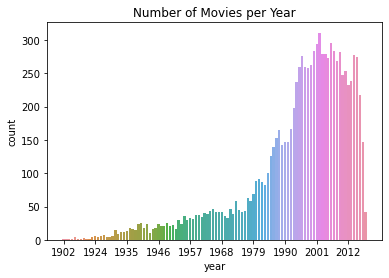

In [125]:
# write code here.
import seaborn as sns
import matplotlib.pyplot as plt
movie_counts = pd.DataFrame(movie[movie["year"]>0].groupby(["year"])["movieId"].count())
movie_counts = movie_counts.rename(columns={"movieId":"count"})
movie_counts = movie_counts.reset_index()
movie_counts.columns
movie_counts
sns.barplot(x="year", y="count", data=movie_counts)
plt.title("Number of Movies per Year")
plt.locator_params(axis="x", nbins=10)
#plt.xticks(range(movie["year"].min(), movie["year"].max(),10))
# movie_counts["year"].min()

there was a rapid increase in the number of movies per year around 1980, but that has reversed after 2001. The decrease is slower than the increase.

# Q7.(1 point) Using matplotlib, plot total number of movies (cumulative over all the years) for each genre.  Your plot should have proper title, axis labels and legends. 

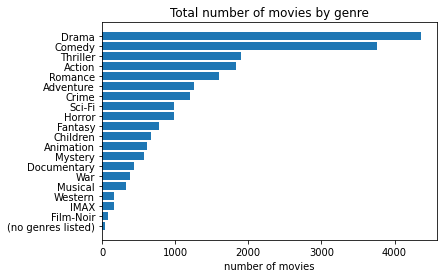

In [126]:
count_by_genre = pd.DataFrame(movie[list(unique_genre)].sum())
count_by_genre.columns=["count"]
count_by_genre = count_by_genre.sort_values(by="count")
plt.barh(count_by_genre.index, count_by_genre["count"])
plt.xlabel("number of movies")
plt.title("Total number of movies by genre")
plt.show()

# Q 8 (.5 point) Build a *movie_title* column containing  the title of the movie. (It should not contain year). Drop the original *title* columns. Display final movie dataFrame.

In [128]:
 # write pandas code here
import re
year_with_paren = "\.*\(\d*\)"
def drop_year(title):
    new_title = re.sub(year_with_paren, "", title)
    return new_title.strip()
movie["movie_title"] = movie["title"].apply(drop_year)
movie_wo_title = movie.drop("title", axis=1)
movie_wo_title.sample(20)

,movieId,genres,Mystery,Comedy,Thriller,Crime,Western,IMAX,Animation,Drama,...,Romance,War,Children,(no genres listed),Musical,Adventure,Fantasy,Film-Noir,year,movie_title
19,20,Action|Comedy|Crime|Drama|Thriller,False,True,True,True,False,False,False,True,...,False,False,False,False,False,False,False,False,1995,Money Train
6281,47721,Children|Fantasy,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,True,False,1956,"Red Balloon, The (Ballon rouge, Le)"
8572,116823,Adventure|Sci-Fi|Thriller,False,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,2014,The Hunger Games: Mockingjay - Part 1
9248,155589,(no genres listed),False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,1968,Noin 7 veljestä
4962,7562,Action|Crime,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,1997,Dobermann
1387,1902,Drama|Romance,False,False,False,False,False,False,False,True,...,True,False,False,False,False,False,False,False,1996,Dream for an Insomniac
8433,111659,Action|Adventure|Children|IMAX,False,False,False,False,False,True,False,False,...,False,False,True,False,False,True,False,False,2014,Maleficent
8719,126142,Adventure|Children|Fantasy,False,False,False,False,False,False,False,False,...,False,False,True,False,False,True,True,False,1991,The Cave of the Golden Rose
5058,7926,Crime|Drama|Film-Noir|Thriller,False,False,True,True,False,False,False,True,...,False,False,False,False,False,False,False,True,1963,High and Low (Tengoku to jigoku)
2262,3003,Comedy|Drama|Romance|War,False,True,False,False,False,False,False,True,...,True,True,False,False,False,False,False,False,1998,Train of Life (Train de vie)


# Q 9(1 point) Using seaborn, plot average number of words in a movie name over the years in different genres. You may choose to make separate plots for each genre or to make a single color coded plot as a function of years. All plots should have proper title, axis labels and legends. Write your observation in no more than 2 lines.

In [172]:
# Write your code here.
paren_re = ".*(\(.*\)).*"
def word_count(title):
    # only count words that fall outside a foreign title which appears inside ()'s
    m = re.search(paren_re, title)
    if m is not None:
        g = m.groups()[0]
        mod_title = title.replace(g, "").strip()
    else:
        mod_title = title
    return len(mod_title.split(" "))
count_columns = {}
for g in list(unique_genre):
    col_name = f'wc_{g}'
    count_columns[g] = col_name
    movie_wo_title[col_name] = movie_wo_title[movie_wo_title[g]]["movie_title"].apply(word_count)
movie_wo_title[movie_wo_title["movie_title"].str.contains("(", regex=False)].head(10)

,movieId,genres,Mystery,Comedy,Thriller,Crime,Western,IMAX,Animation,Drama,...,wc_Sci-Fi,wc_Documentary,wc_Romance,wc_War,wc_Children,wc_(no genres listed),wc_Musical,wc_Adventure,wc_Fantasy,wc_Film-Noir
28,29,Adventure|Drama|Fantasy|Mystery|Sci-Fi,True,False,False,False,False,False,False,True,...,5.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,5.0,NaN
29,30,Crime|Drama,False,False,False,True,False,False,False,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31,32,Mystery|Sci-Fi|Thriller,True,False,True,False,False,False,False,False,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43,47,Mystery|Thriller,True,False,True,False,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52,58,Comedy|Drama|Romance,False,True,False,False,False,False,False,True,...,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60,68,Comedy|Romance,False,True,False,False,False,False,False,False,...,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72,80,Children|Drama,False,False,False,False,False,False,False,True,...,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN
74,82,Comedy|Drama,False,True,False,False,False,False,False,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86,97,Crime|Drama,False,False,False,True,False,False,False,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94,106,Comedy|Drama,False,True,False,False,False,False,False,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [200]:
avg_wc_df = pd.DataFrame(movie_wo_title["year"])
for g, wc_col in count_columns.items():
    avg_wc_df[g] = movie_wo_title[movie_wo_title[g]].groupby(["year"])[wc_col].mean()
avg_wc_df[avg_wc_df["Comedy"].notna()].sort_values(by="year")

,year,Mystery,Comedy,Thriller,Crime,Western,IMAX,Animation,Drama,Action,...,Sci-Fi,Documentary,Romance,War,Children,(no genres listed),Musical,Adventure,Fantasy,Film-Noir
1990,1931,2.166667,2.762712,3.000000,2.708333,3.750000,NaN,8.166667,2.693548,3.371429,...,3.588235,3.000000,2.923077,2.625,3.750000,3.0,2.333333,4.750000,2.466667,2.0
1991,1931,2.500000,2.782609,2.727273,2.764706,4.000000,4.0,4.000000,2.730159,3.923077,...,4.000000,4.250000,2.741935,2.000,5.142857,NaN,3.285714,3.944444,4.357143,NaN
1983,1932,5.750000,3.000000,2.153846,3.500000,2.000000,NaN,4.000000,2.413793,3.000000,...,3.100000,2.000000,2.142857,3.500,4.200000,NaN,2.333333,3.555556,3.285714,NaN
1994,1941,2.750000,2.918919,2.542857,2.851852,3.000000,3.0,4.000000,2.692982,3.275000,...,2.454545,4.000000,2.658537,3.000,2.958333,NaN,3.333333,2.866667,2.812500,3.0
1992,1943,3.000000,2.927536,2.593750,2.391304,2.666667,1.0,3.875000,2.641026,2.677419,...,2.800000,4.333333,2.583333,4.250,3.230769,4.0,2.600000,3.666667,2.555556,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1939,1999,3.000000,2.555556,3.000000,3.000000,2.000000,NaN,2.000000,3.200000,1.000000,...,NaN,NaN,2.444444,3.000,2.750000,NaN,3.500000,3.000000,4.000000,NaN
1938,1999,3.000000,2.750000,3.500000,4.000000,NaN,NaN,3.000000,2.111111,3.500000,...,NaN,NaN,3.750000,2.000,3.000000,NaN,3.000000,5.000000,3.000000,4.0
1937,1999,NaN,3.666667,3.000000,3.500000,NaN,NaN,6.000000,3.083333,3.000000,...,NaN,NaN,3.000000,2.000,3.500000,NaN,4.666667,2.500000,6.000000,4.0
1935,1999,3.000000,3.285714,3.000000,NaN,NaN,NaN,NaN,3.333333,2.000000,...,4.000000,NaN,2.666667,NaN,NaN,NaN,3.000000,3.000000,4.000000,NaN
